In [161]:


# load output table from TR_MH_build_results_table.R
# what fraction of tandem duplications have MHPs? 
import allel
import numpy
from matplotlib import pyplot as plt 
import matplotlib
import pandas as pd
import re
import seaborn as sns
import scipy
import os


In [175]:
# load VCF with annotations from snpEFF
#  java -jar snpEff/snpEff.jar eff Schizosaccharomyces_pombe PombeGenomesAll.vcf  > PombeGenomesAll_snpEff.vcf
# callset = allel.read_vcf( 'PombeGenomesAll_snpEff.vcf' )

# cut -f 1-8 PombeGenomesAll_snpEff.vcf | vcf2bed --insertions  --do-not-sort > insertions_snpEFF.txt

#callsetdf = allel.vcf_to_recarray( callset ) # parsing is broken!


# manually extract effects of interest : 
insertions_df = pd.read_csv('insertions_snpEFF.txt',sep='\t' \
                            ,index_col=False \
                            ,names=['m_chr','start','m_pos','id','score','m_ref','alt','id2','desc'])
insertions_df = insertions_df.drop(columns=['id','id2'])
insertions_df['conservative_inframe_insertion'] = insertions_df['desc'].str.contains('conservative_inframe_insertion')
insertions_df['disruptive_inframe_insertion'] = insertions_df['desc'].str.contains('disruptive_inframe_insertion')
insertions_df['frameshift_variant'] = insertions_df['desc'].str.contains('frameshift_variant')
insertions_df['stop_gained'] = insertions_df['desc'].str.contains('stop_gained')

insertions_df.head(20)


,m_chr,start,m_pos,score,m_ref,alt,desc,conservative_inframe_insertion,disruptive_inframe_insertion,frameshift_variant,stop_gained
0,I,4951,4952,4736.39,G,GT,"AC=63,1;AF=0.220,3.497e-03;AN=286;BaseQRankSum...",False,False,True,False
1,I,5346,5347,9115.36,T,TAGAGAGAGC,"AC=8,2,4,2;AF=0.028,6.897e-03,0.014,6.897e-03;...",True,False,False,False
2,I,5346,5347,9115.36,T,TAGAGAGAGCAGAGAGAGC,"AC=8,2,4,2;AF=0.028,6.897e-03,0.014,6.897e-03;...",True,False,False,False
3,I,5346,5347,9115.36,T,TAGAGGGAGCAAAGGGAGC,"AC=8,2,4,2;AF=0.028,6.897e-03,0.014,6.897e-03;...",True,False,False,False
4,I,5349,5350,42138.97,A,AGG,AC=76;AF=0.203;AN=374;BaseQRankSum=-4.010e-01;...,False,False,True,False
5,I,5351,5352,280664.07,A,AGCAAAGG,"AC=138,28,12,23,12;AF=0.423,0.086,0.037,0.071,...",False,False,True,False
6,I,5351,5352,280664.07,A,AGCAGAGGGAGCAGAGG,"AC=138,28,12,23,12;AF=0.423,0.086,0.037,0.071,...",False,False,True,False
7,I,5351,5352,280664.07,A,AGCAAAGGGAGCAAAGG,"AC=138,28,12,23,12;AF=0.423,0.086,0.037,0.071,...",False,False,True,False
8,I,5351,5352,280664.07,A,AGTAGAGG,"AC=138,28,12,23,12;AF=0.423,0.086,0.037,0.071,...",False,False,True,False
9,I,5356,5357,171351.46,A,AGAGGGAGCG,AC=102;AF=0.273;AN=374;BaseQRankSum=1.23;DP=90...,False,True,False,False


In [176]:
# load data
df = pd.read_csv( 'PombeGenomesAll.txt' , sep='\t')
#df = pd.read_csv( 'insertion_alt_seqs.txt' , sep='\t')
df = df.drop( columns=['sequence']) ; 

# metadata
a =df['chr'].str.split('_' , expand=True)

df['m_chr'] = (a.iloc[:,0])
df['m_pos'] = (a.iloc[:,1]).astype('int')
df['m_ref'] = (a.iloc[:,2])
df.head(50)


,chr,pos,k,posOriginal,rep,consensus,entropy,mh,mh_seq,m_chr,m_pos,m_ref
0,I_5347_T_REF,244,9,253,4,AGAGAGAGC,1.576640,False,NaN,I,5347,T
1,I_5347_T_REF,315,12,315,2,CCTCACTGG[C/T]AG,1.932932,True,CCTCA,I,5347,T
2,I_5347_T_ALT_TAGAG_10,244,9,253,5,AGAGAGAGC,1.555205,False,NaN,I,5347,T
3,I_5347_T_ALT_TAGAG_10,324,12,324,2,CCTCACTGG[C/T]AG,1.932932,True,CCTCA,I,5347,T
4,I_5347_T_ALT_TAGAG_19,244,9,253,6,AGAGAGAGC,1.538394,False,NaN,I,5347,T
5,I_5347_T_ALT_TAGAG_19,333,12,333,2,CCTCACTGG[C/T]AG,1.932932,True,CCTCA,I,5347,T
6,I_5347_T_ALT_TAGAG_19,244,9,267,6,AGAGAGAGC,1.538394,False,NaN,I,5347,T
7,I_5347_T_ALT_TAGAG_19,244,9,258,6,AGAGAGAGC,1.538394,False,NaN,I,5347,T
8,I_5352_A_REF,239,9,248,4,AGAGAGAGC,1.576640,False,NaN,I,5352,A
9,I_5352_A_REF,310,12,310,2,CCTCACTGG[C/T]AG,1.932932,True,CCTCA,I,5352,A


In [177]:
# remove all chrs where the Tandem Repeat is also found in the REF

chr_id  = df['chr'].str.replace('_REF','')
chr_id2 = df['chr'].str.replace('_[AR][LE].*','')
discard_idx = numpy.isin( chr_id2 , chr_id) 
print( f'Will discard %0.0d%% of the rows because TR found in REF' % (100*discard_idx.mean()) )
df['TR_Not_InRef'] = ~discard_idx
df['InCorrectLocation'] = (df['posOriginal']>245) & (df['posOriginal']<260)
df['GoodTR'] = (df.TR_Not_InRef) & (df.InCorrectLocation) & (df.entropy>=1.4)  & (df.rep==2)
print( f'Will keep %0.0d (%0.0d%%) of the rows for all reasons' % (df['GoodTR'].sum() , 100*df['GoodTR'].mean()) ) 
df = df.sort_values('rep',ascending=True)
df.loc[df.GoodTR,:].head(2)

Will discard 87% of the rows because TR found in REF
Will keep 207 (1%) of the rows for all reasons


,chr,pos,k,posOriginal,rep,consensus,entropy,mh,mh_seq,m_chr,m_pos,m_ref,TR_Not_InRef,InCorrectLocation,GoodTR
2720,I_3938351_G_ALT_GAAAG_22,253,21,253,2,AAAGAGCCTCAAATTAAGCTA,1.822119,True,AAAGAGCC,I,3938351,G,True,True,True
7153,II_4474322_T_ALT_TAATC_32,252,33,252,2,TAATCATTCCCAAGGCTGCACCCA[A/G]G[A/G]CTGC[C/T]A,1.950063,True,TAATCAT,II,4474322,T,True,True,True


In [178]:
print( df.mh.mean() )
print( df.mh[df.GoodTR].mean() )
# df.loc[ df['chr'].str.find('144204')>-1 , :]
# df.query('m_pos == 145211')
dfg = df.loc[df.GoodTR,:]
ndf = df.merge( insertions_df , how='inner' , on=['m_chr','m_pos','m_ref'])
ndf.head()

0.255324934288045
0.5507246376811594


,chr,pos,k,posOriginal,rep,consensus,entropy,mh,mh_seq,m_chr,...,InCorrectLocation,GoodTR,start,score,alt,desc,conservative_inframe_insertion,disruptive_inframe_insertion,frameshift_variant,stop_gained
0,II_1952058_A_ALT_ATTTT_7,251,16,251,1,TATTTTATTTGTATTG,1.199460,True,TATTTTATTT,II,...,True,False,1952057,3168.97,ATTTTAT,"AC=6,22;AF=0.015,0.054;AN=408;DP=3866;ExcessHe...",False,True,False,False
1,II_1952058_A_REF,412,12,413,2,[C/T]TCTCTTCTCTC,0.994985,False,NaN,II,...,False,False,1952057,3168.97,ATTTTAT,"AC=6,22;AF=0.015,0.054;AN=408;DP=3866;ExcessHe...",False,True,False,False
2,II_1952058_A_ALT_ATTTT_7,418,12,419,2,[C/T]TCTCTTCTCTC,0.994985,False,NaN,II,...,False,False,1952057,3168.97,ATTTTAT,"AC=6,22;AF=0.015,0.054;AN=408;DP=3866;ExcessHe...",False,True,False,False
3,II_1952058_A_ALT_ATTTT_7,243,16,251,2,TTGTATTGTATTTTAT,1.199460,True,TT,II,...,True,False,1952057,3168.97,ATTTTAT,"AC=6,22;AF=0.015,0.054;AN=408;DP=3866;ExcessHe...",False,True,False,False
4,II_1952058_A_ALT_ATTTT_7,240,21,240,2,[G/T]TATTGTATT[G/T]TATTTTATTT,1.125491,False,NaN,II,...,False,False,1952057,3168.97,ATTTTAT,"AC=6,22;AF=0.015,0.054;AN=408;DP=3866;ExcessHe...",False,True,False,False


In [209]:
stop_or_frameshift = ndf.loc[ ndf.GoodTR & (ndf["stop_gained"] | ndf["disruptive_inframe_insertion"])]
inframe  = ndf.loc[ ndf.GoodTR &  ~ndf["stop_gained"] & ndf["conservative_inframe_insertion"] ]
len(inframe)

print(f'Stop or FrameShift: N={len(stop_or_frameshift)} , with MTD = \
{len(stop_or_frameshift.loc[ndf.mh])}\
, with non-MH TD = {len(stop_or_frameshift.loc[~ndf.mh])}\
')

print(f'in-frame: N={len(inframe)} , with MTD = \
{len(inframe.loc[ndf.mh])}\
, with non-MH TD = {len(inframe.loc[~ndf.mh])}\
')

Stop or FrameShift: N=35 , with MTD = 15, with non-MH TD = 20
in-frame: N=27 , with MTD = 21, with non-MH TD = 6


In [210]:
t = [[15 ,20],[21 ,6]]
oddsratio , pvalue = scipy.stats.fisher_exact( t )
print('OR={0:0.3f} p={1:0.3f}'.format(oddsratio , pvalue) )

OR=0.214 p=0.009


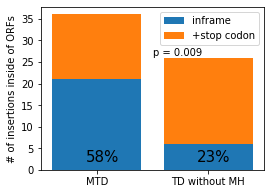

In [281]:
# Figure showing that MTDs tend to create more functional variation vs non-MH TDs
plt.rcParams['figure.figsize'] = 4,3
pIF  = plt.bar( [1,2] , [21,6] )
pOOF = plt.bar( [1,2] , [15,20], bottom=[21,6] )
plt.xticks( [1,2,3] , ['MTD' , 'TD without MH'])
plt.legend( (pIF[0],pOOF[0]) , ('inframe' , '+stop codon' ) , frameon=True , loc='upper right')
plt.ylabel('# of insertions inside of ORFs')
plt.annotate( str(round(100*(21/(21+15))))+'%' , xy=(0.9,2) , fontsize=15)
plt.annotate( str(round(100*(6/(6+20))))+'%' , xy=(1.9,2) , fontsize=15)
plt.annotate("p = 0.009" , xy=(1.5,26.5) , fontsize=10)
#plt.ylim([0,39.9])
plt.xlim([0.5,2.5])
plt.savefig(os.getenv('HOME') + '/Downloads/snpEFF_WildPombe_MTD_vs_TD_noMH__inframe_vs_plus-stop.png' \
     , dpi=600)
plt.show()


Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or PathLike or file-like object
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is not set, then the output format is inferred from
    the extension of *fname*, if any, and from :rc:`savefig.format`
    otherwise.  If *format* is set, it determines the output format.

    Hence, if *fname* is not a path or has no extension, remember to
    specify *format* to ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar > 0 | 